In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
tstep = [0.01, 0.001]

results = defaultdict(list)
for file in range(5001):  
    filename = f'dump0.01/{file}.xyz'
    data = np.genfromtxt(filename, skip_header=2)
    results[0.01].append(data)

    filename = f'dump0.001/{file * 10 + 50000}.xyz'
    data = np.genfromtxt(filename, skip_header=2)
    results[0.001].append(data)

    
results[0.01] = np.array(results[0.01])
results[0.001] = np.array(results[0.001])
results[0.01].shape

FileNotFoundError: dump_0.01/0.xyz not found.

In [ ]:
results[0.001].shape

(5001, 216, 6)

In [ ]:
discrepancy = np.mean((results[0.01] - results[0.001])**2, axis=1)
discrepancy

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.82922542e-09, 1.84878199e-09, 3.38763889e-09, 3.02614038e-06,
        7.36571839e-07, 1.29397176e-06],
       [9.38081500e-09, 5.73154382e-09, 1.08141679e-08, 7.33232118e-06,
        2.50917725e-06, 4.94867255e-06],
       ...,
       [9.83070371e+00, 1.06690845e+01, 9.27754394e+00, 2.28535812e+00,
        2.16669058e+00, 1.85682514e+00],
       [9.77965203e+00, 1.06690135e+01, 9.04206162e+00, 2.30191457e+00,
        2.16522170e+00, 1.82735255e+00],
       [9.74510496e+00, 1.08584680e+01, 9.04401229e+00, 2.32224038e+00,
        2.13694418e+00, 1.80563630e+00]])

In [ ]:
time = np.linspace(0.0, 50.0, 5001)

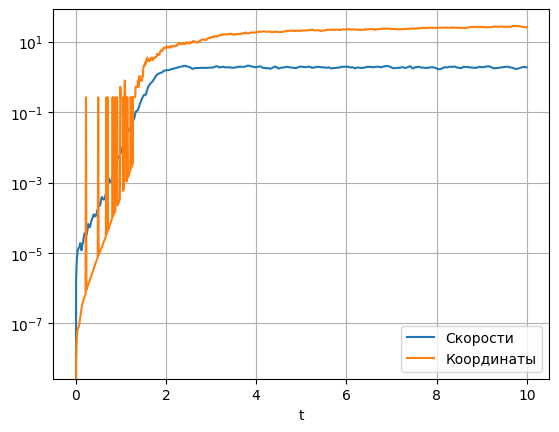

In [ ]:
plt.plot(time[:1000], discrepancy[:1000, 3:].sum(axis=1) / (2*3**0.5), label='Скорости')
plt.plot(time[:1000], discrepancy[:1000, :3].sum(axis=1), label='Координаты')
plt.legend()
plt.yscale('log')
plt.xlabel('t')
plt.grid()
plt.show()